In [ ]:
任务：基于task1_data数据，建立rnn模型，使用收盘价格预测贵州茅台次日收盘股价。：

1、完成基本的数据加载、可视化工作；
2、数据预处理：将数据转化为符合RNN模型输入要求的数据；
3、建立RNN模型并训练模型，计算训练集、测试集模型预测r2分数；
4、可视化预测表现；
5、将测试数据预测结果保存到本地csv文件

模型结构：单层RNN，输出有5个神经元
每次使用前10个数据预测第11个数据

In [3]:
# 数据加载
import pandas as pd
import numpy as np
data_train = pd.read_csv('task1_data_train.csv')
data_train.head()

,date,open,high,low,close,volume
0,2015/1/5,156.8681,168.9629,156.0988,167.5400,94515
1,2015/1/6,165.4553,167.5731,162.1627,163.6601,55020
2,2015/1/7,162.1793,165.0416,157.1742,159.6147,54797
3,2015/1/8,160.4916,160.9218,157.2983,158.6385,40525
4,2015/1/9,157.5134,161.9559,157.2735,157.4390,53982


In [8]:
# 获取收盘价格 close
price_close = data_train.loc[:,'close']
print(price_close)

0        167.5400
1        163.6601
2        159.6147
3        158.6385
4        157.4390
          ...    
1214    1120.6068
1215    1121.9907
1216    1149.5684
1217    1172.1051
1218    1169.3375
Name: close, Length: 1219, dtype: float64


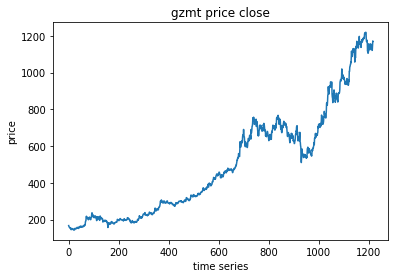

In [15]:
# 价格可视化
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(price_close)
# 补充图片信息
plt.title('gzmt price close')
plt.xlabel('time series')
plt.ylabel('price')
plt.show()
## plt.show()和plt.imshow:二者都可以显示图像，plt.show显示的是plt绘制的图像，而plt.imshow显示的是调用出的二进制矩阵的图像。

In [26]:
# 数据预处理》归一化
# 所有数据都除最大值
price_norm = price_close/max(price_close)
print(price_norm)

0       0.137384
1       0.134202
2       0.130885
3       0.130085
4       0.129101
          ...   
1214    0.918906
1215    0.920041
1216    0.942655
1217    0.961135
1218    0.958865
Name: close, Length: 1219, dtype: float64


IndexError: tuple index out of range

In [53]:
# 数据序列提取
def extract_data(data,time_step=10):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]]) # 按数组格式储存 
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0],X.shape[1],1) # reshapeX，使其符合RNN模型输入格式。（sample，序列长度，数据维度）
    return X,y

In [56]:
# 方法测试
test_data = [i for i in range(1,10)]
print(test_data)
test_step = 5
X,y = extract_data(test_data,test_step)
print(X)
print(y)
print(X.shape)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[[[1]
  [2]
  [3]
  [4]
  [5]]

 [[2]
  [3]
  [4]
  [5]
  [6]]

 [[3]
  [4]
  [5]
  [6]
  [7]]

 [[4]
  [5]
  [6]
  [7]
  [8]]]
[6, 7, 8, 9]
(4, 5, 1)


In [77]:
# 股票数据数据处理
price_sample,price_result = extract_data(price_norm,time_step=10)
price_sample[0:2,:,:]

array([[[0.13738403],
        [0.13420248],
        [0.13088522],
        [0.13008473],
        [0.12910113],
        [0.12646899],
        [0.12541758],
        [0.12426432],
        [0.12622479],
        [0.12625194]],

       [[0.13420248],
        [0.13088522],
        [0.13008473],
        [0.12910113],
        [0.12646899],
        [0.12541758],
        [0.12426432],
        [0.12622479],
        [0.12625194],
        [0.11904087]]])

In [62]:
# 确认数据维度
print(price_sample.shape)

(1209, 10, 1)


In [64]:
# 建立RNN模型
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=5,input_shape=(10,1),activation='relu'))
# 输出层
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [67]:
# 参数配置
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(price_sample,price_result,batch_size=30,epochs=200)

Epoch 1/200
1209/1209 [==============================] - 1s 461us/step - loss: 0.0109
Epoch 2/200
1209/1209 [==============================] - 0s 76us/step - loss: 0.0010
Epoch 3/200
1209/1209 [==============================] - 0s 79us/step - loss: 4.0714e-04
Epoch 4/200
1209/1209 [==============================] - 0s 82us/step - loss: 2.2052e-04
Epoch 5/200
1209/1209 [==============================] - 0s 80us/step - loss: 1.5863e-04
Epoch 6/200
1209/1209 [==============================] - 0s 82us/step - loss: 1.3782e-04
Epoch 7/200
1209/1209 [==============================] - 0s 79us/step - loss: 1.2941e-04
Epoch 8/200
1209/1209 [==============================] - 0s 76us/step - loss: 1.2028e-04
Epoch 9/200
1209/1209 [==============================] - 0s 76us/step - loss: 1.1603e-04
Epoch 10/200
1209/1209 [==============================] - 0s 78us/step - loss: 1.1945e-04
Epoch 11/200
1209/1209 [==============================] - 0s 81us/step - loss: 1.1355e-04
Epoch 12/200
1209/1209 [==

1209/1209 [==============================] - 0s 80us/step - loss: 1.3197e-04
Epoch 90/200
1209/1209 [==============================] - 0s 75us/step - loss: 1.1380e-04: 0s - loss: 1.2329e-0
Epoch 91/200
1209/1209 [==============================] - 0s 77us/step - loss: 1.1334e-04
Epoch 92/200
1209/1209 [==============================] - 0s 75us/step - loss: 1.2159e-04
Epoch 93/200
1209/1209 [==============================] - 0s 78us/step - loss: 1.0630e-04
Epoch 94/200
1209/1209 [==============================] - 0s 72us/step - loss: 1.1029e-04
Epoch 95/200
1209/1209 [==============================] - 0s 77us/step - loss: 1.0928e-04
Epoch 96/200
1209/1209 [==============================] - 0s 78us/step - loss: 1.1510e-04
Epoch 97/200
1209/1209 [==============================] - 0s 77us/step - loss: 1.2437e-04
Epoch 98/200
1209/1209 [==============================] - 0s 75us/step - loss: 1.1846e-04
Epoch 99/200
1209/1209 [==============================] - 0s 77us/step - loss: 1.1474e-04
E

1209/1209 [==============================] - 0s 78us/step - loss: 1.2169e-04
Epoch 179/200
1209/1209 [==============================] - 0s 78us/step - loss: 1.1085e-04
Epoch 180/200
1209/1209 [==============================] - 0s 74us/step - loss: 1.0575e-04
Epoch 181/200
1209/1209 [==============================] - 0s 73us/step - loss: 1.0908e-04
Epoch 182/200
1209/1209 [==============================] - 0s 73us/step - loss: 1.0325e-04
Epoch 183/200
1209/1209 [==============================] - 0s 71us/step - loss: 1.0168e-04
Epoch 184/200
1209/1209 [==============================] - 0s 76us/step - loss: 1.0656e-04
Epoch 185/200
1209/1209 [==============================] - 0s 74us/step - loss: 9.7405e-05
Epoch 186/200
1209/1209 [==============================] - 0s 78us/step - loss: 9.9534e-05
Epoch 187/200
1209/1209 [==============================] - 0s 115us/step - loss: 1.0094e-04
Epoch 188/200
1209/1209 [==============================] - 0s 180us/step - loss: 9.7178e-05
Epoch 189/2

In [78]:
# 结果预测
price_train_predict = model.predict(price_sample)
price_train_predict = price_train_predict*max(price_close)
print(price_train_predict)
price_result = [i*max(price_close) for i in price_result] # price_result是单列表结构 要让其中每个元素单独去乘法运算
print(price_result)

[[ 150.6705 ]
 [ 142.1746 ]
 [ 143.63869]
 ...
 [1116.0264 ]
 [1145.1183 ]
 [1162.9233 ]]
[145.1705, 147.3214, 150.8621, 149.9273, 149.7536, 151.2261, 149.0007, 146.8167, 145.7247, 146.5768, 144.6245, 147.5613, 146.6347, 143.9875, 144.4425, 152.467, 151.2923, 151.5157, 151.8631, 150.9697, 151.648, 150.7463, 152.1858, 154.4029, 158.0511, 157.7864, 153.832, 154.8579, 153.4763, 151.9045, 158.4731, 155.3873, 158.82050000000004, 159.4575, 157.1081, 160.29309999999998, 162.7832, 165.0003, 161.5505, 159.78839999999997, 161.3851, 161.8897, 159.4823, 164.264, 160.9466, 162.7832, 162.1131, 161.6002, 160.9714, 162.81629999999998, 166.0095, 169.178, 165.4553, 165.6373, 168.6816, 170.4189, 170.1707, 187.1878, 192.3914, 193.6075, 212.9658, 218.31, 211.8158, 213.8427, 211.609, 205.0735, 206.6371, 208.66389999999998, 210.93070000000003, 199.33220000000003, 200.7634, 202.6248, 210.2688, 212.97400000000002, 210.4757, 212.1137, 207.9855, 202.82329999999996, 199.4894, 206.8522, 210.0868, 213.9254000000000

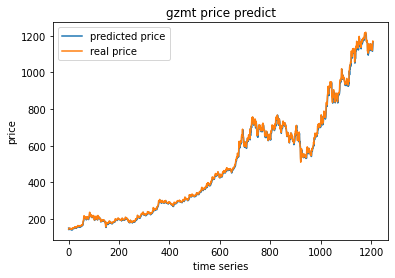

In [81]:
# 结果可视化
fig2 = plt.figure()
plt.plot(price_train_predict,label='predicted price')
plt.plot(price_result,label='real price')
# 补充图片信息
plt.title('gzmt price predict')
plt.xlabel('time series')
plt.ylabel('price')
plt.legend()
plt.show()

In [83]:
# 计算R2分数
from sklearn.metrics import r2_score
r2_train = r2_score(price_train_predict,price_result)
print(r2_train)

0.9981474182234427


In [100]:
# 预测测试集数据
data_test = pd.read_csv('task1_data_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test_n = price_test/max(price_close)

In [109]:
# 股票数据数据处理
test_sample,test_result = extract_data(price_test_n,time_step=10)
price_test_predict = model.predict(test_sample)

In [110]:
price_test_predict = price_test_predict*max(price_close)
price_test_result = [i*max(price_close) for i in test_result]
print(price_test_result)
print(price_test_predict)

[1094.2152, 1094.7094, 1078.4, 1062.8813, 1063.0889, 1040.6411, 992.3257, 1026.022, 1037.8636, 1058.631, 1063.5732, 1054.173, 1085.3191, 1084.5976, 1078.4, 1075.4346, 1081.1874, 1071.4808, 1083.8365, 1105.0882, 1100.0273, 1074.6241, 1062.397, 1061.2998, 1074.8317, 1044.7926, 1073.4676, 1100.1459, 1115.882, 1157.476, 1142.1551, 1101.1442, 1142.6493, 1145.1402, 1125.3514, 1099.1871, 1054.6772, 1033.0301, 996.3487, 984.4971, 1023.3235, 1007.2315, 1043.8042, 1067.6259, 1052.6212, 1063.079, 1059.6194, 1098.1689999999999, 1090.2614, 1131.7763, 1126.6265, 1146.5537, 1146.3659, 1145.1204, 1151.5453, 1148.8765, 1171.4132, 1175.8612, 1183.2746, 1211.8409, 1213.1258, 1186.1411, 1230.1272000000001, 1237.7976000000003, 1236.1172, 1261.2634, 1264.3572, 1260.1761, 1251.0824, 1284.9862, 1296.8476, 1299.4275, 1307.7305, 1317.6051000000002, 1320.521, 1311.2691, 1297.8361, 1330.6625, 1330.5637, 1335.3972000000003, 1350.3228, 1312.8605, 1347.1598, 1342.3164, 1322.5474, 1328.4781000000003, 1350.8171, 1403.

In [112]:
r2_test = r2_score(price_test_result,price_test_predict)
print(r2_test)

0.986300765109974


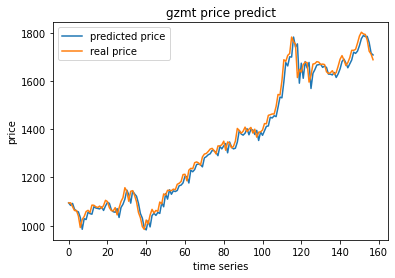

In [113]:
# 测试结果可视化
fig2 = plt.figure()
plt.plot(price_test_predict,label='predicted price')
plt.plot(price_test_result,label='real price')
# 补充图片信息
plt.title('gzmt price predict')
plt.xlabel('time series')
plt.ylabel('price')
plt.legend()
plt.show()

In [119]:
# 数据存储
y_test_r = np.array(price_test_result).reshape(-1,1) # 和预测结果转换成统一格式
print(y_test_r.shape)
print(price_test_predict.shape)
final_result = np.concatenate((y_test_r,price_test_predict),axis=1)
print(final_result)
final_result_df = pd.DataFrame(final_result,columns=['real price','predict price'])
final_result_df.to_csv('predict_test.csv')

(158, 1)
(158, 1)
[[1094.2152     1094.46337891]
 [1094.7094     1084.1138916 ]
 [1078.4        1092.27539062]
 [1062.8813     1068.63513184]
 [1063.0889     1060.12316895]
 [1040.6411     1057.32165527]
 [ 992.3257     1033.8190918 ]
 [1026.022       984.94842529]
 [1037.8636     1028.88659668]
 [1058.631      1025.41394043]
 [1063.5732     1055.79589844]
 [1054.173      1049.88378906]
 [1085.3191     1047.55749512]
 [1084.5976     1078.67944336]
 [1078.4        1073.3425293 ]
 [1075.4346     1071.24267578]
 [1081.1874     1069.36816406]
 [1071.4808     1077.74633789]
 [1083.8365     1063.11901855]
 [1105.0882     1081.89160156]
 [1100.0273     1096.47937012]
 [1074.6241     1092.71508789]
 [1062.397      1066.23693848]
 [1061.2998     1057.84753418]
 [1074.8317     1055.50219727]
 [1044.7926     1070.81652832]
 [1073.4676     1034.00268555]
 [1100.1459     1075.38598633]
 [1115.882      1088.58056641]
 [1157.476      1109.98486328]
 [1142.1551     1147.53625488]
 [1101.1442     1128.